In [3]:
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [4]:
train_data = pd.read_csv("archive/Training Data.csv")

In [5]:
train_data.drop("Id",axis=1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [6]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
train_data["Profession"]=pd.factorize(train_data.Profession)[0]
train_data["CITY"]=pd.factorize(train_data.CITY)[0]
train_data["STATE"]=pd.factorize(train_data.STATE)[0]
train_data["Married/Single"]=pd.factorize(train_data['Married/Single'])[0]
train_data["House_Ownership"]=pd.factorize(train_data.House_Ownership)[0]
train_data["Car_Ownership"]=pd.factorize(train_data.Car_Ownership)[0]

In [8]:
xtrain=train_data.drop(["Risk_Flag","Id"],axis=1)
ytrain=train_data["Risk_Flag"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.3)

In [11]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features=10,n_estimators=50)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_features=10, n_estimators=50)

In [12]:
X_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
4407,8997854,36,16,0,0,0,44,35,13,5,10
29439,1052130,29,16,0,0,0,13,130,8,3,14
124809,4140213,45,6,0,0,0,6,1,1,6,14
67550,2197462,70,5,0,0,0,28,16,10,5,11
114962,5616951,54,13,0,0,1,47,94,8,12,13


In [13]:
y_pred = RFC.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

accu = accuracy_score(y_test,y_pred)
presi = precision_score(y_test,y_pred)
reca = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(accu)
print("--------")
print(presi)
print("--------")
print(f1)
print("-------------")
print(reca)

0.8985449735449735
--------
0.5977398413080067
--------
0.5645509254002499
-------------
0.5348537005163512


<AxesSubplot:>

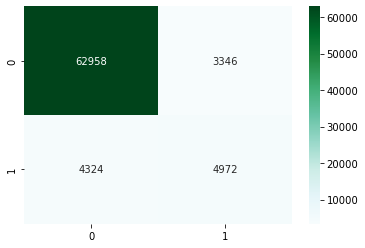

In [15]:
import seaborn as sns 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g', cmap="BuGn", cbar=True)

In [16]:
import pickle
pickle.dump(RFC,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model)

RandomForestClassifier(max_features=10, n_estimators=50)
